In [29]:
##Importing all the neccessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import mlflow as mf
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
data = pd.read_csv('fetal_health.csv')

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
##Dropping some columns after feature extraction is done with XGBoost
data = data.drop(columns= ['light_decelerations','severe_decelerations','histogram_tendency','prolongued_decelerations','histogram_number_of_zeroes'])

In [8]:
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [9]:
data.corr().T

,baseline value,accelerations,fetal_movement,uterine_contractions,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,0.708993,0.723121,0.789246,-0.133938,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,0.243610,0.270334,0.272849,0.125704,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.061192,-0.089671,-0.072329,0.179340,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,-0.104854,-0.187505,-0.140287,0.238582,-0.204894
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,0.058363,0.074554,0.119960,-0.146434,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,-0.307586,-0.445401,-0.336109,0.555852,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,0.165211,0.222321,0.186480,-0.281536,0.426146
mean_value_of_long_term_variability,-0.032091,-0.142363,0.011047,-0.066058,-0.315105,0.073892,-0.171114,1.000000,0.110942,-0.144976,0.002023,0.056357,0.072071,0.137813,0.063228,-0.164079,-0.226797
histogram_width,-0.147679,0.298631,0.162790,0.142541,-0.260463,0.660847,-0.451297,0.110942,1.000000,-0.898519,0.690769,0.747071,-0.159261,-0.280846,-0.168854,0.615884,-0.068789
histogram_min,0.361619,-0.154286,-0.153917,-0.113323,0.275378,-0.622569,0.422834,-0.144976,-0.898519,1.000000,-0.303286,-0.670287,0.353067,0.486121,0.400191,-0.545091,0.063175


C:\Users\yksut\AppData\Local\Temp\ipykernel_14396\1244663638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fetal_health', data=data, palette='viridis')


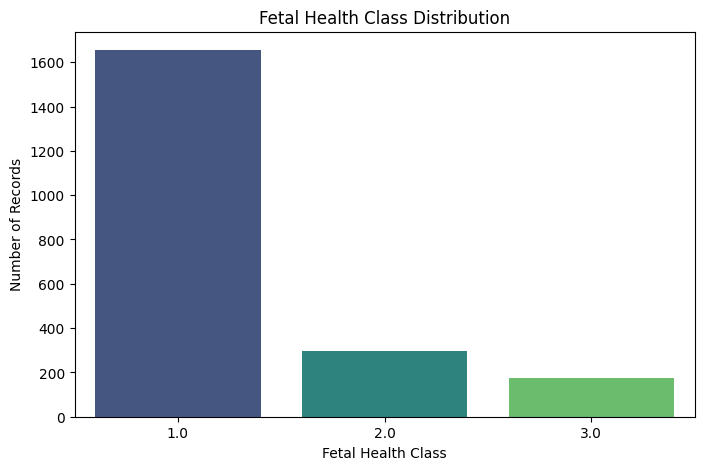

In [10]:
plt.figure(figsize=(8, 5))  
sns.countplot(x='fetal_health', data=data, palette='viridis')  

plt.title('Fetal Health Class Distribution') 
plt.xlabel('Fetal Health Class') 
plt.ylabel('Number of Records')  

plt.show()  


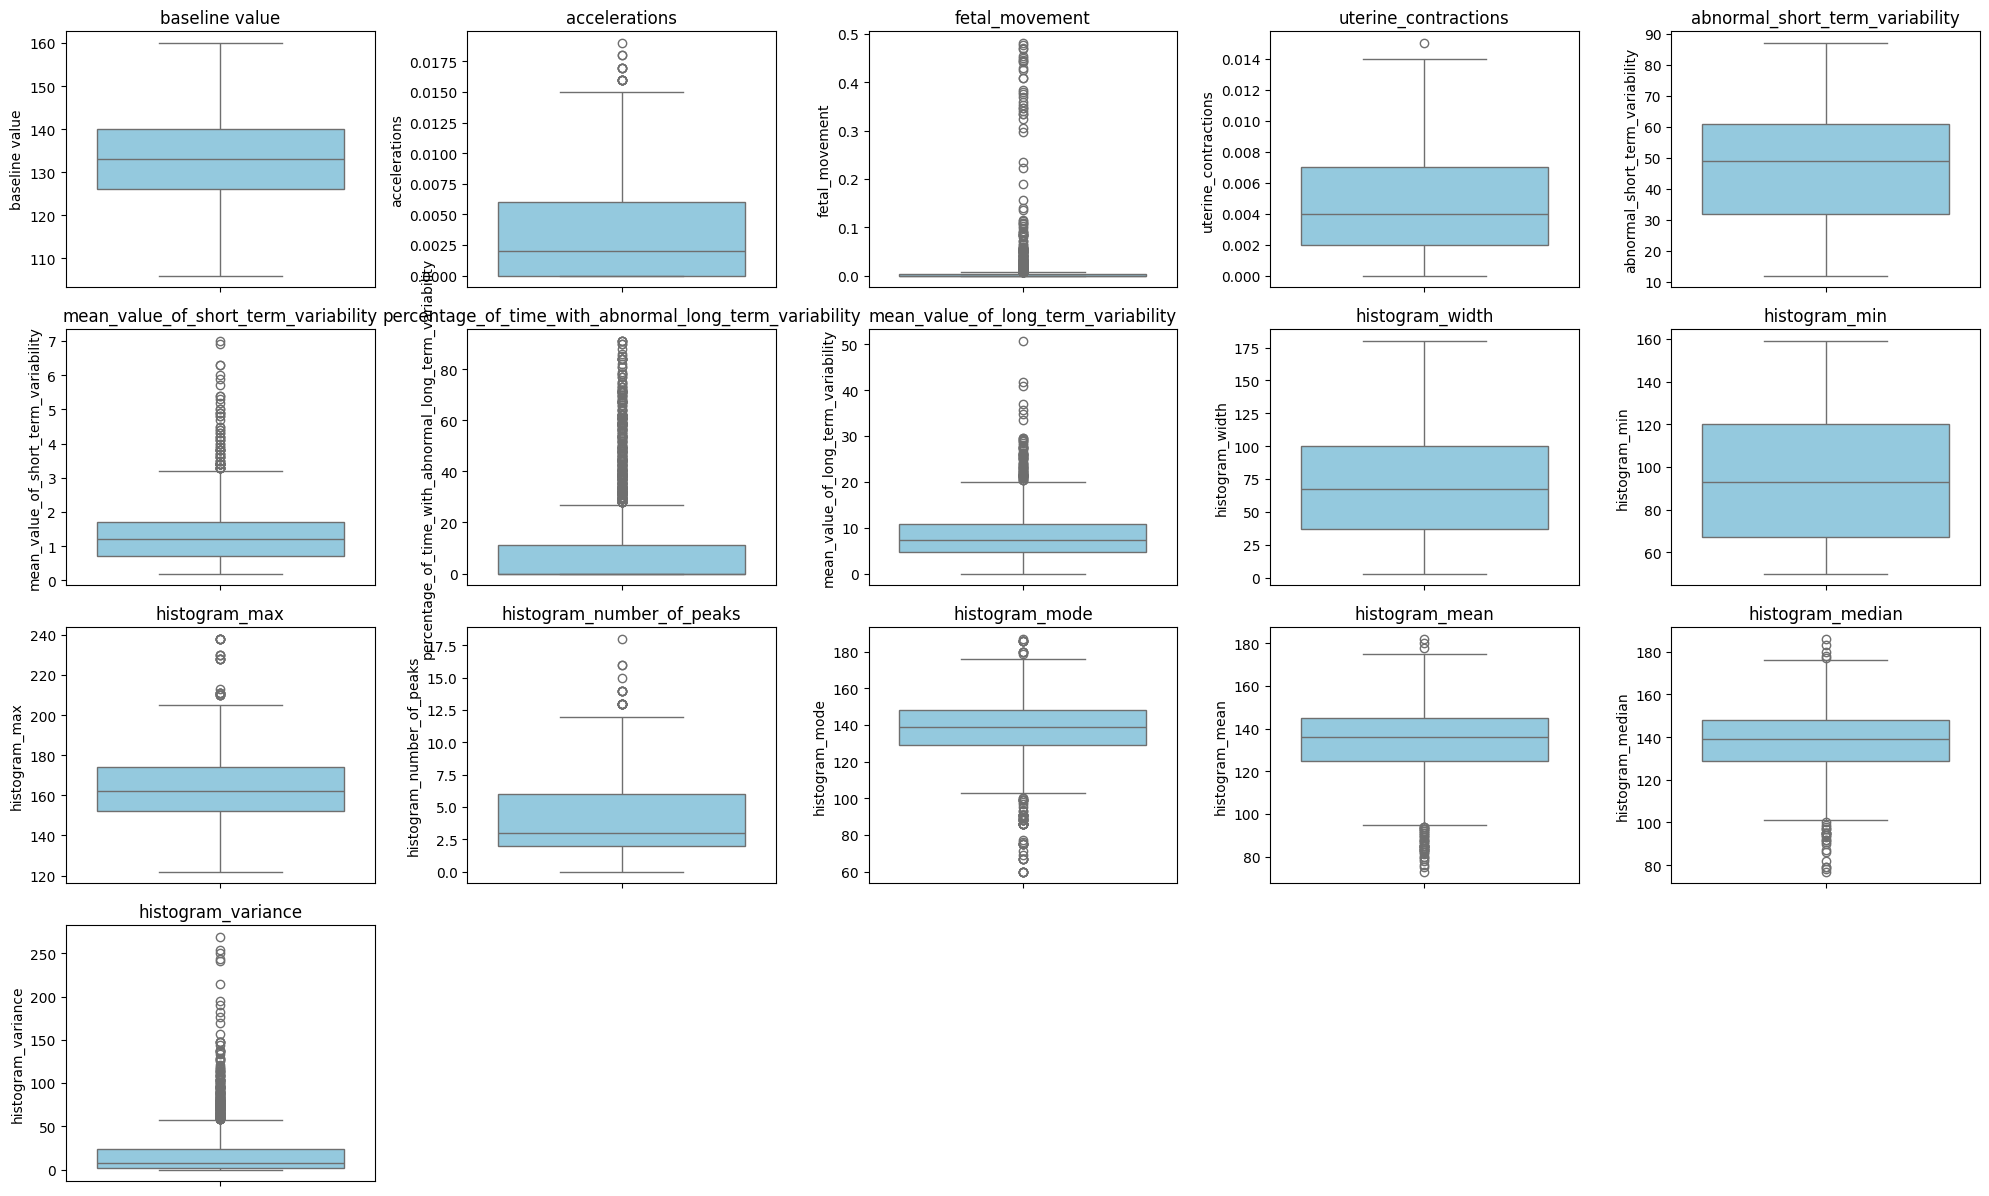

In [11]:
plt.figure(figsize=(20, 15)) 
for index, column in enumerate(data.columns[:-1], 1): 
    plt.subplot(5, 5, index)
    sns.boxplot(data[column], color='skyblue') 
    plt.title(column) 
plt.tight_layout()  
plt.show() 

In [12]:
##handling infinite and NaN values
data = data.fillna(data.mean())

data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())


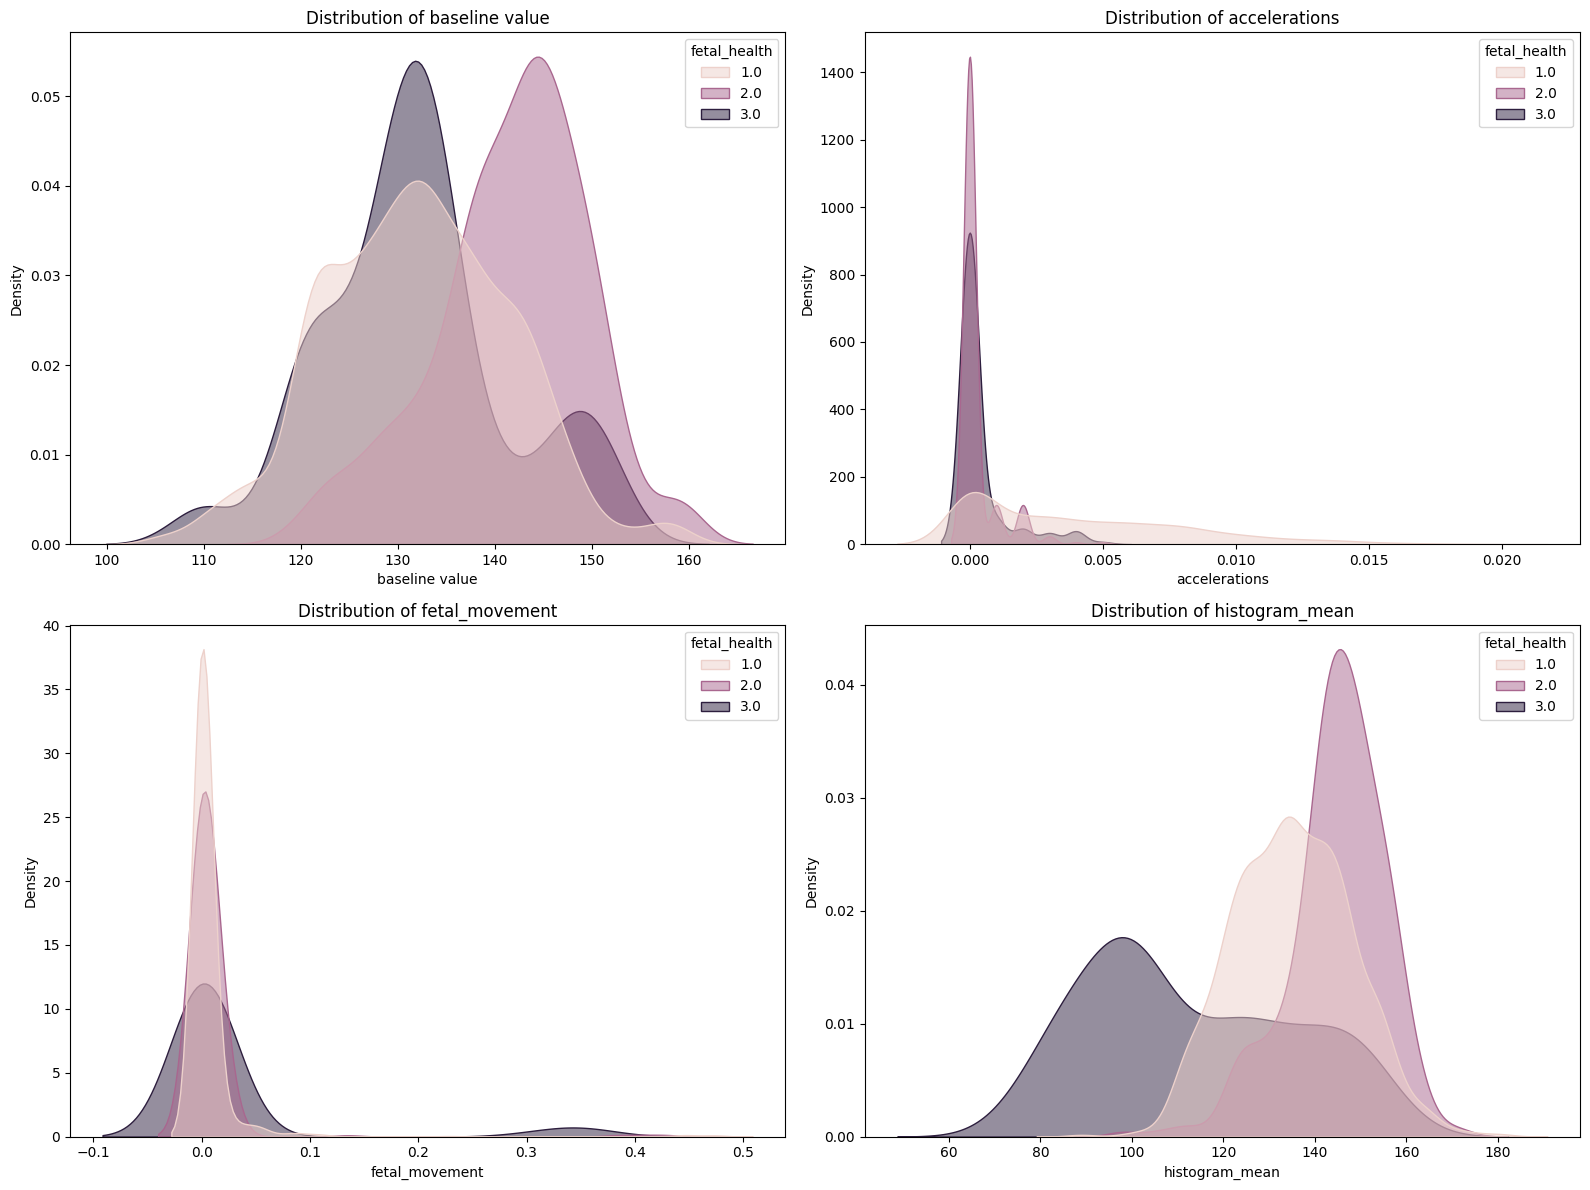

In [13]:
##plotting distributions of some features
features_to_plot = ['baseline value', 'accelerations', 'fetal_movement', 'histogram_mean']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(
        data=data, 
        x=feature, 
        hue="fetal_health", 
        fill=True, 
        common_norm=False, 
        alpha=0.5
    )
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [14]:
#splitting the data
X = data.drop(columns=['fetal_health'])
y = data['fetal_health']

#scaling the data 
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#experimenting with Smote For handling class imbalances in some columns
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [16]:
y_train.value_counts()

fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64

In [17]:
##encoding the target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [18]:
#XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',  
    num_class=3,              
    eval_metric='mlogloss',    
    random_state=42
)

#Hyperparameter tuning
param_grid = {
    'n_estimators': [10,20,30],
    'max_depth': [3,4],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.6,0.7,0.8],
    'colsample_bytree': [0.6,0.7,0.8]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc_ovr', 
    cv=5,
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

#Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.7}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       333
           1       0.68      0.89      0.77        64
           2       0.82      0.97      0.89        29

    accuracy                           0.91       426
   macro avg       0.83      0.92      0.87       426
weighted avg       0.92      0.91      0.91       426

Confusion Matrix:
 [[301  27   5]
 [  6  57   1]
 [  1   0  28]]


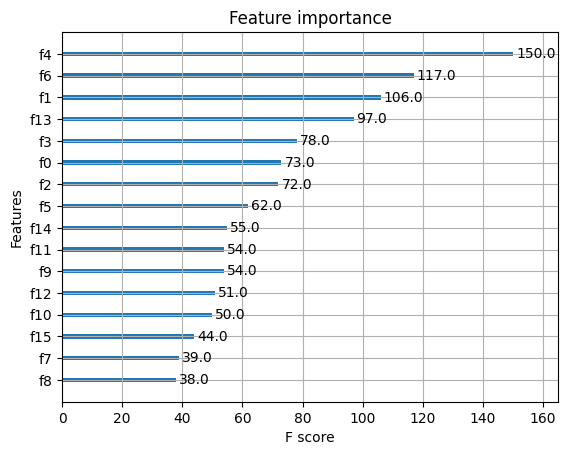

In [19]:
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

xgb.plot_importance(best_model)
plt.show()

Test Accuracy: 0.960093896713615


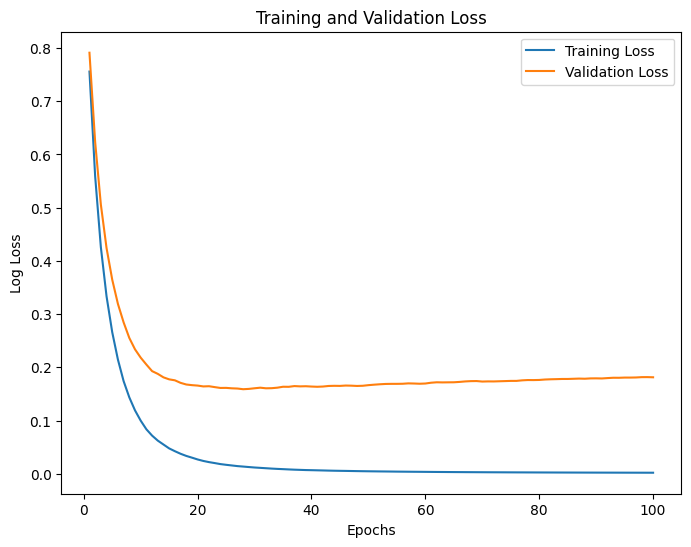

In [21]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

eval_set = [(X_train, y_train), (X_test, y_test)]
history = xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False 
)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

results = xgb_model.evals_result()

#Plotting accuracy 
epochs = range(1, len(results['validation_0']['mlogloss']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, results['validation_0']['mlogloss'], label='Training Loss')
plt.plot(epochs, results['validation_1']['mlogloss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

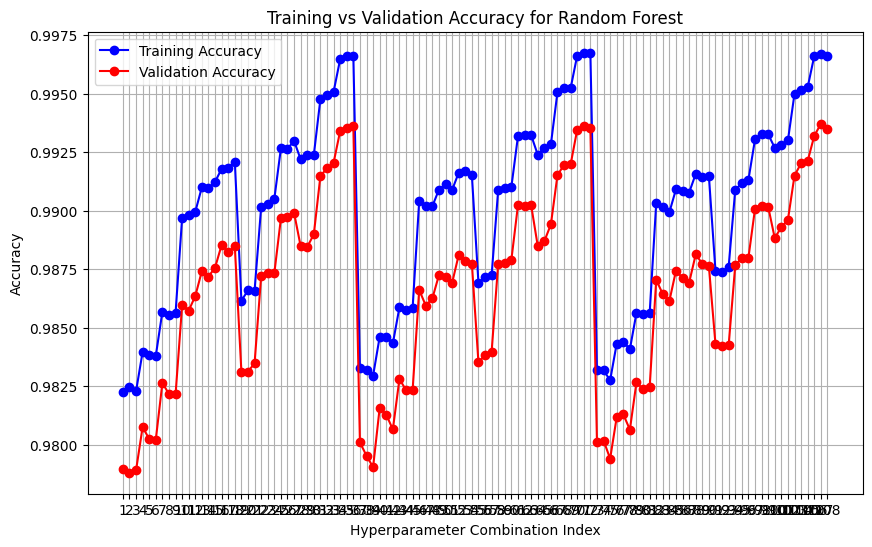

In [22]:
##plotting training and test accuracy
cv_results = grid_search.cv_results_

train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
param_combinations = range(1, len(train_scores) + 1)


plt.figure(figsize=(10, 6))
plt.plot(param_combinations, train_scores, label='Training Accuracy', marker='o', color='blue')
plt.plot(param_combinations, validation_scores, label='Validation Accuracy', marker='o', color='red')

plt.title('Training vs Validation Accuracy for Random Forest')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Accuracy')
plt.xticks(param_combinations)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
##uploading the model and its parameters to MLflow UI 
mf.set_tracking_uri('http://127.0.0.1:5000/')

experiment_name = 'first experiment'
client = MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)

if experiment is None:
    experiment_id = client.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

mf.set_experiment(experiment_name)


with mf.start_run(experiment_id=experiment_id):
    mf.log_params(param_grid)
    mf.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score'],
    })
    mf.sklearn.log_model(best_model, 'XGBoost Classifier')


2025/01/23 13:53:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/23 13:53:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run colorful-snipe-121 at: http://127.0.0.1:5000/#/experiments/304004650538094830/runs/d65844906970475592d65898de52c659.
2025/01/23 13:53:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/304004650538094830.


In [24]:
## Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

#Hyperparameter Tuning
param_grid = {
    'n_estimators': [10,15],  
    'max_depth': [5,4],  
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],  
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=2, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_rf_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

report_dict_rfc = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Accuracy: 0.8732394366197183
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       333
           1       0.59      0.84      0.69        64
           2       0.76      0.86      0.81        29

    accuracy                           0.87       426
   macro avg       0.77      0.86      0.81       426
weighted avg       0.90      0.87      0.88       426

Confusion Matrix:
 [[293  34   6]
 [  8  54   2]
 [  0   4  25]]


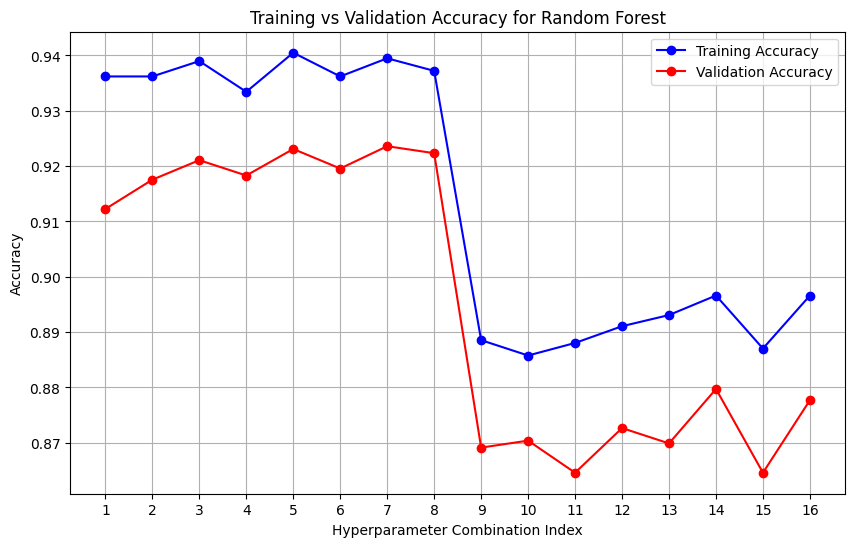

2025/01/23 13:53:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/23 13:53:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run abundant-grouse-136 at: http://127.0.0.1:5000/#/experiments/304004650538094830/runs/df33c8e41f844bd999b14a355445b8a8.
2025/01/23 13:53:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/304004650538094830.


In [25]:
cv_results = grid_search.cv_results_

train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
param_combinations = range(1, len(train_scores) + 1)


plt.figure(figsize=(10, 6))
plt.plot(param_combinations, train_scores, label='Training Accuracy', marker='o', color='blue')
plt.plot(param_combinations, validation_scores, label='Validation Accuracy', marker='o', color='red')

plt.title('Training vs Validation Accuracy for Random Forest')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Accuracy')
plt.xticks(param_combinations)
plt.legend()
plt.grid(True)
plt.show()


with mf.start_run(experiment_id=experiment_id):
    mf.log_params(param_grid)
    mf.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score'],
    })
    mf.sklearn.log_model(best_model, 'Random Forest Classifier')


In [26]:
#DICISION TREE CLASSIFIER
dtc = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [3, 5,7,9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4,6,8],
    'criterion': ['gini', 'entropy']
}

#hyperparameter tuning
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, return_train_score=True ,verbose=1)
grid_search.fit(X_train, y_train)

#Getting the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

#Training the best model
best_dtc = grid_search.best_estimator_

#getting Predict
y_train_pred = best_dtc.predict(X_train)
y_test_pred = best_dtc.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

#Confusion-Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 0.9763
Testing Accuracy: 0.9272
Confusion Matrix:
 [[313  16   4]
 [ 10  54   0]
 [  1   0  28]]


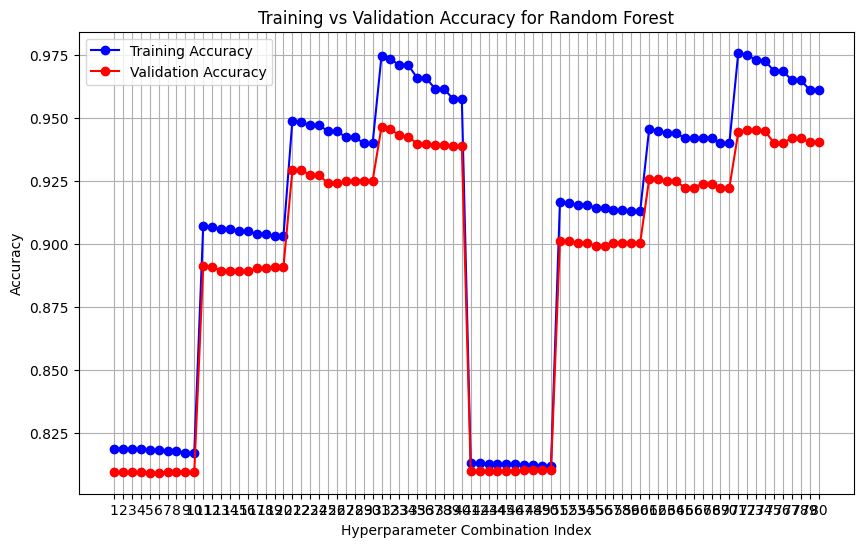

2025/01/23 13:53:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/23 13:53:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run dapper-mink-882 at: http://127.0.0.1:5000/#/experiments/304004650538094830/runs/8407029ff6614adbb8037efd9fb7d5f1.
2025/01/23 13:53:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/304004650538094830.


In [27]:
cv_results = grid_search.cv_results_

train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
param_combinations = range(1, len(train_scores) + 1)


plt.figure(figsize=(10, 6))
plt.plot(param_combinations, train_scores, label='Training Accuracy', marker='o', color='blue')
plt.plot(param_combinations, validation_scores, label='Validation Accuracy', marker='o', color='red')

plt.title('Training vs Validation Accuracy for Random Forest')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Accuracy')
plt.xticks(param_combinations)
plt.legend()
plt.grid(True)
plt.show()



with mf.start_run(experiment_id=experiment_id):
    mf.log_params(param_grid)
    mf.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score'],
    })
    mf.sklearn.log_model(best_model, 'Dicision Tree Classifier')



In [30]:
##saving the models
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

with open('DTC_model.pkl', 'wb') as file:
    pickle.dump(best_dtc, file)

with open('RFC_model.pkl', 'wb') as file:
    pickle.dump(best_rf_clf, file)
